In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Exercise ####


#### Please refer to module 1 of Intro to visualization in python - Static Plots for Tasks 1-13
#### Task 1
##### Import the required packages.
##### Set `data_dir` and `plot_dir` to the path of the data/plot directory.
##### Print `data_dir` and `plot_dir`.


In [2]:
working_dir = os.getcwd()
print(working_dir)
print(os.listdir())
filename = 'diabetes.csv'
if 'data' in os.listdir(working_dir):
    os.chdir('data')
    data_dir = os.getcwd()
    if filename in os.listdir():
        file = pd.read_csv(filename)
        print('file was found')
else:
    working_dir = Path(working_dir).parent
    os.chdir(working_dir)
    print(working_dir)


/home/jovyan/TEDS-Jul2022/2
['SimpleRegression-SimpleLinear-exercises.ipynb', 'IntroToStatistics-BasicsOfStatistics-exercises.ipynb', 'IntroToStatistics-HypothesisTesting-exercises.ipynb', 'data', 'MultipleRegression-MultipleLinear-exercises.ipynb', 'stats_equations.ipynb', '.ipynb_checkpoints', 'IntroToVisualizationInPython-StaticPlots-exercises.ipynb', 'intermediate-statistics-exercises.ipynb', 'NonlinearRegression-exercises.ipynb']
file was found


#### Task 2
##### Read in our dataset called `diabetes.csv`. Save it as `ex_data`.
##### Print the head of `ex_data`.
##### Subset the data to have numeric and categorical columns
##### Impute the data with mean
##### Convert the non-numeric categorical columns to numeric
#### Result:


In [3]:
ex_data = file
ex_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,id
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,3
3,1,89,66,23,94,28.1,0.167,21,0,4
4,0,137,40,35,168,43.1,2.288,33,1,5


In [4]:
ex_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
id                          0
dtype: int64

In [5]:
ex_data = ex_data.select_dtypes(['int','float'])
ex_data.set_index('id')

ex_data.fillna(ex_data.mean())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,id
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,3
3,1,89,66,23,94,28.1,0.167,21,0,4
4,0,137,40,35,168,43.1,2.288,33,1,5
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,764
764,2,122,70,27,0,36.8,0.340,27,0,765
765,5,121,72,23,112,26.2,0.245,30,0,766
766,1,126,60,0,0,30.1,0.349,47,1,767


#### Task 3
##### Group `ex_data` data by the `'Outcome'` variable. Save as `ex_grouped`.
##### Then group and summarize all the variables by `'Outcome'` using their means. Save as `ex_grouped_mean` and print.
##### Reset its index and print the result.
#### Result:


In [6]:
ex_grouped = ex_data.groupby('Outcome')
ex_grouped_mean = ex_grouped.mean().reset_index()
ex_grouped_mean

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,id
0,0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,391.834000
1,1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,370.817164


#### Task 4
##### Notice the format of `ex_grouped_mean`. We wish to convert it from wide to long format.
##### Use the `pd.melt()` function and convert it to long format. Save as `ex_grouped_mean_long` and print the result.
#### Result:


In [7]:
ex_grouped_mean_long = pd.melt(ex_grouped_mean, id_vars = 'Outcome', var_name = 'parameter', value_name = 'value')
ex_grouped_mean_long

,Outcome,parameter,value
0,0,Pregnancies,3.298000
1,1,Pregnancies,4.865672
2,0,Glucose,109.980000
3,1,Glucose,141.257463
4,0,BloodPressure,68.184000
5,1,BloodPressure,70.824627
6,0,SkinThickness,19.664000
7,1,SkinThickness,22.164179
8,0,Insulin,68.792000
9,1,Insulin,100.335821


#### Task 5
##### Now use the `pd.pivot()` function to convert `ex_grouped_mean_long` to wide format.
##### Save as `ex_grouped_mean_wide` and print.
#### Result:


In [8]:
ex_grouped_mean_wide = pd.pivot(ex_grouped_mean_long,index = 'Outcome', columns = 'parameter', 
                                                    values = 'value')  

ex_grouped_mean_wide

parameter,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness,id
Outcome,,,,,,,,,
0,31.190000,30.304200,68.184000,0.429734,109.980000,68.792000,3.298000,19.664000,391.834000
1,37.067164,35.142537,70.824627,0.550500,141.257463,100.335821,4.865672,22.164179,370.817164


#### Task 6
##### Use the `plt.hist()` function to create a simple histogram of `'BloodPressure'`.
#### Result:


<AxesSubplot:>

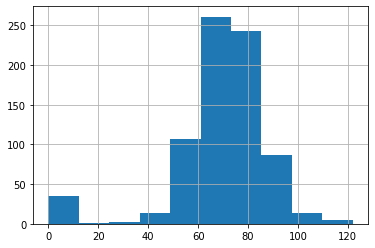

In [9]:
ex_data['BloodPressure'].hist()

#### Task 7
##### Now run the same code as above and set the number of bins as 25. 
##### Name the x-axis and the y-axis as `percent_house_below_poverty` and `Frequency` respectively. 
##### Also include the title `Percent House below Poverty Distribution`.
#### Result:


Text(0, 0.5, 'freq')

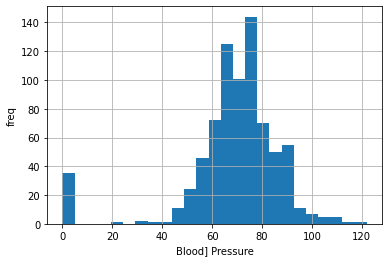

In [10]:
ex_data['BloodPressure'].hist(bins = 25)
plt.xlabel('Blood] Pressure')
plt.ylabel('freq')

#### Task 8
##### Create a simple boxplot of `'BloodPressure'` and show the results.
#### Result:


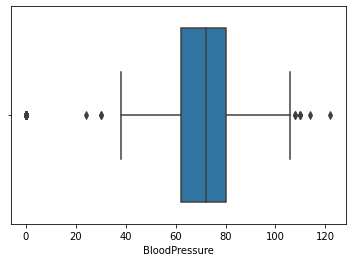

In [11]:
sns.boxplot(x = ex_data['BloodPressure'])
plt.show()

#### Task 9
##### Now try to create the same boxplot by changing its orientation to horizontal.
##### Also label the x-axis and title accordingly.
#### Result:


<AxesSubplot:>

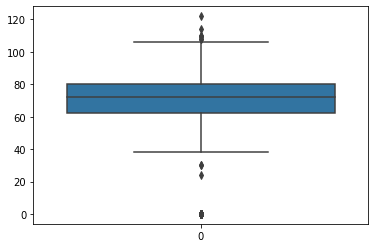

In [12]:
sns.boxplot(data= ex_data['BloodPressure'], orient="v")

#### Task 10
##### Now let's create a barplot using the long data `ex_grouped_mean_long`.
##### To do that, first filter `'Outcome'` by a category and then create two columns in the dataframe: `metrics` and `means`.
##### Save as `ex_true_means` and print.
#### Result:


In [14]:
query = 'Outcome' + '==' + '0'
ex_true_means = ex_grouped_mean_long.query(query)[['parameter','value']]
print(ex_true_means)



                   parameter       value
0                Pregnancies    3.298000
2                    Glucose  109.980000
4              BloodPressure   68.184000
6              SkinThickness   19.664000
8                    Insulin   68.792000
10                       BMI   30.304200
12  DiabetesPedigreeFunction    0.429734
14                       Age   31.190000
16                        id  391.834000


#### Task 11
##### Create the following variables needed to construct a bar plot:


- `ex_bar_labels` with the `metric`
- `ex_bar_heights` with the `mean`
- `num_bars` having the length of `ex_bar_heights`
- `ex_bar_positions` having the range of `ex_num_bars`


#### Result:


In [15]:
ex_bar_labels = ex_true_means['parameter']
ex_bar_heights = ex_true_means['value']
num_bars = len(ex_bar_heights)
ex_bar_positions = range(num_bars)

print(ex_bar_labels)
print(ex_bar_positions)
print(ex_bar_heights)

0                  Pregnancies
2                      Glucose
4                BloodPressure
6                SkinThickness
8                      Insulin
10                         BMI
12    DiabetesPedigreeFunction
14                         Age
16                          id
Name: parameter, dtype: object
range(0, 9)
0       3.298000
2     109.980000
4      68.184000
6      19.664000
8      68.792000
10     30.304200
12      0.429734
14     31.190000
16    391.834000
Name: value, dtype: float64


#### Task 12
##### Create a basic bar chart with the variables above. 
##### Label the title and y-axis accordingly. 
##### Add the title "Exercise Means".
#####  Rotate the labels to a vertical position ( set `rotation`= 90 ) to make them easier to read.
#### Result:


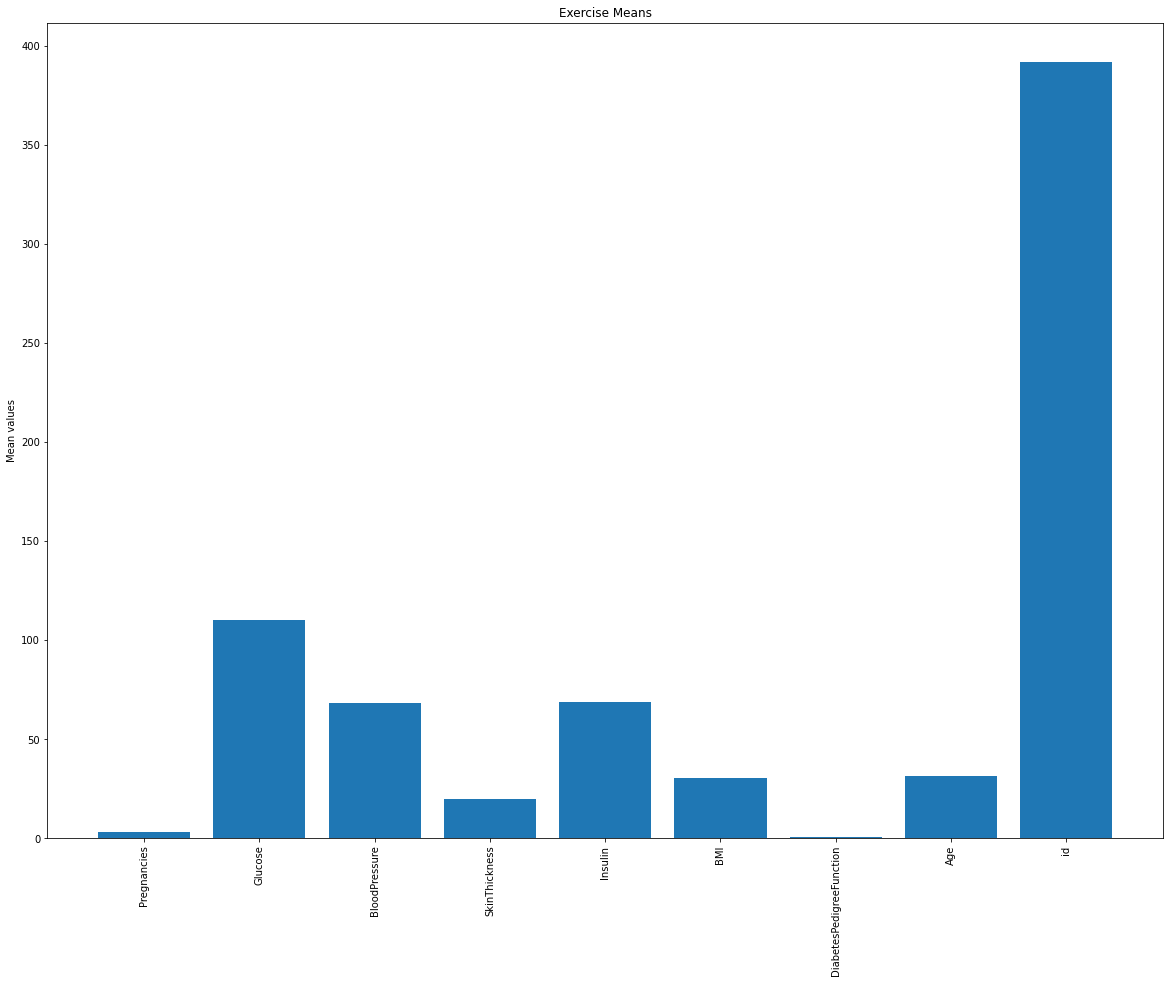

In [16]:
plt.figure(figsize = (20, 15)) 

plt.bar(ex_bar_positions, ex_bar_heights)

plt.xticks(ex_bar_positions, ex_bar_labels, rotation = 90)
plt.ylabel('Mean values')
plt.title('Exercise Means')


plt.show()
plt.close()



#### Task 13
##### Plot the above bar chart, this time by adjusting the size of the figure.
##### Use the `plt.figsize()` to set the width as `20` and the height as `15`.
#### Result:


In [17]:
# done above

#### Please refer to module 2 of Intro to visualization in python - Static Plots for Tasks 14-18
#### Task 14
##### Create a simple scatterplot with `'BloodPressure'` on the x-axis and `'BloodPressure'` on the y-axis.
#### Result:


<AxesSubplot:xlabel='BloodPressure', ylabel='Insulin'>

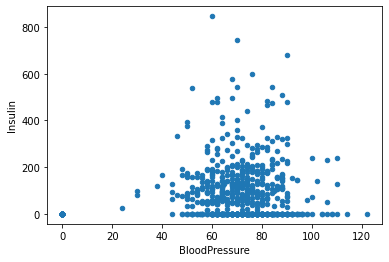

In [18]:
ex_data.plot(kind = 'scatter', x = 'BloodPressure' , y = 'Insulin')

#### Task 15
##### Plot the above scatterplot and name the axes and title accordingly.
##### Set the marker to `X` and view the plot.
#### Result:


<AxesSubplot:xlabel='BloodPressure', ylabel='Insulin'>

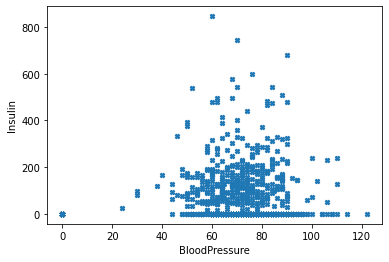

In [19]:
ex_data.plot(kind = 'scatter', x = 'BloodPressure' , y = 'Insulin', marker = 'X')

#### Task 16
##### Customize the following graphs and view the plots as mentioned below:


- Histogram of variable `'BloodPressure'` and color `lightcoral` 
- Above bar chart  using color `thistle` using the `plt.figsize()` to set the width as `20` and the height as `15`.
- Above scatterplot of `'BloodPressure'` on the x-axis and `'Insulin'` on the y-axis using color `firebrick`


#### Result:


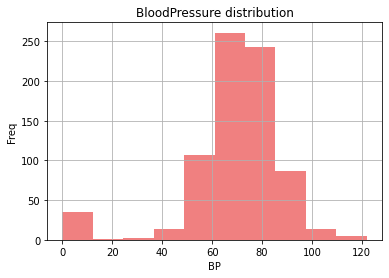

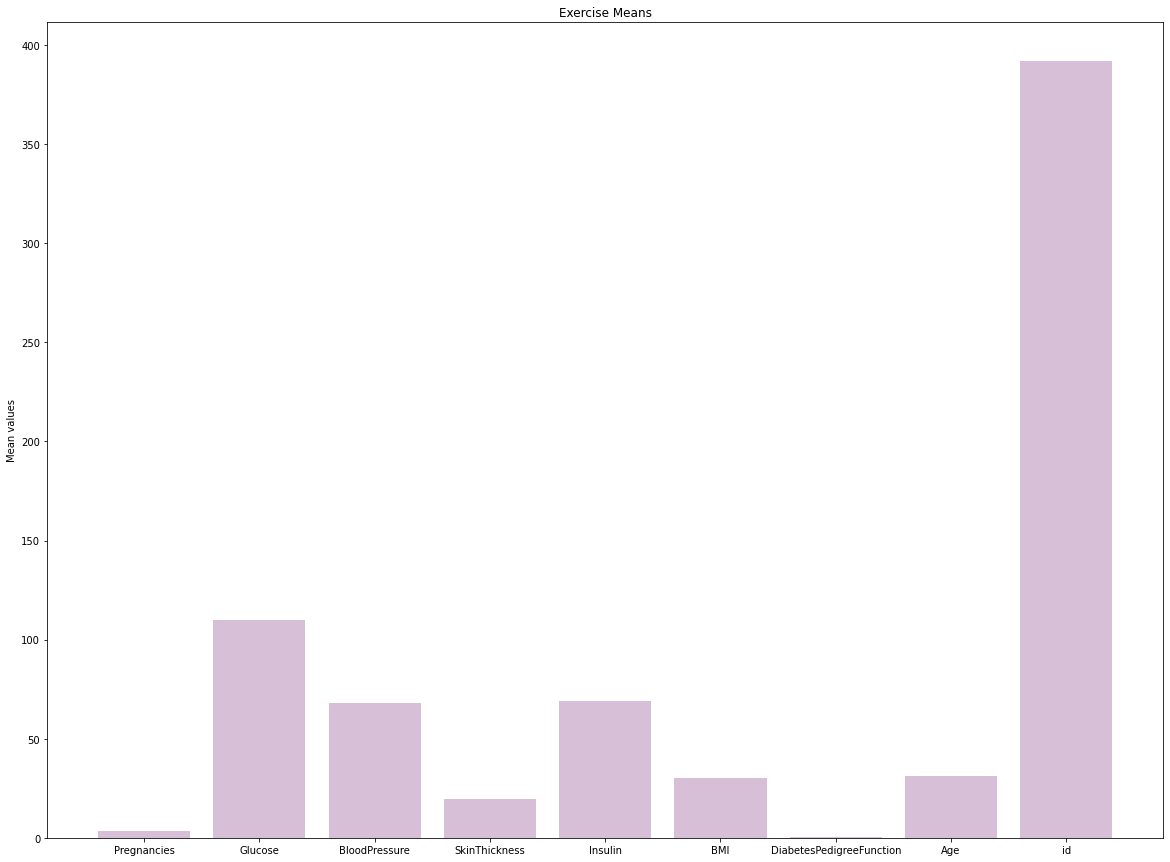

In [20]:
ex_data['BloodPressure'].hist(color = 'lightcoral')
plt.xlabel('BP')             
plt.ylabel('Freq')        
plt.title('BloodPressure distribution')  
plt.show()
plt.show()
plt.close()

plt.figure(figsize = (20, 15)) 
plt.bar(ex_bar_positions, ex_bar_heights, color = "thistle")
plt.xticks(ex_bar_positions, ex_bar_labels)
plt.ylabel('Mean values')
plt.title('Exercise Means')  #<- add plot title
plt.show()

<AxesSubplot:xlabel='BloodPressure', ylabel='Insulin'>

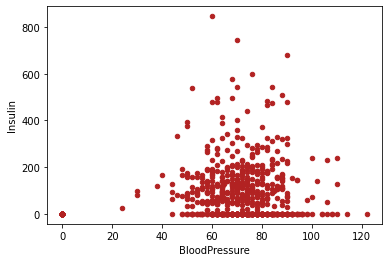

In [100]:
ex_data.plot(kind = 'scatter', x = 'BloodPressure', y = 'Insulin', color = 'firebrick')

#### Task 17
##### Create a color dictionary called `ex_color_dict` corresponding with `'Outcome'`:
##### - '0' corresponding to color `darkorange`
##### - '1' corresponding to color `skyblue`
##### Set the color as `ex_color_dict` and create a scatterplot with the same parameters `'BloodPressure'` and `'Insulin'`.
##### Then, change the opacity using `alpha` to 0.6.
#### Result:


In [25]:
ex_color_dict = {0: 'darkorange', 
                 1: 'skyblue'}
color = ex_data['Outcome'].map(ex_color_dict)
print(color.head())


0       skyblue
1    darkorange
2       skyblue
3    darkorange
4       skyblue
Name: Outcome, dtype: object


<AxesSubplot:xlabel='BloodPressure', ylabel='Insulin'>

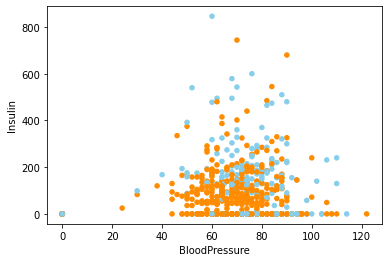

In [30]:
ex_data.plot(kind = 'scatter', x = 'BloodPressure',y = 'Insulin' , color = color)

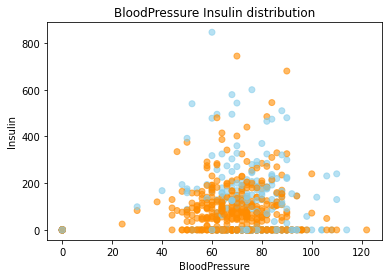

In [31]:
plt.scatter(ex_data['BloodPressure'],
            ex_data['Insulin'],
            c = color,
            alpha = 0.6)
plt.xlabel('BloodPressure')                
plt.ylabel('Insulin')
plt.title('BloodPressure Insulin distribution') 
plt.show()

#### Task 18
##### Print the available pre-defined styles provided by `matplotlib`.
##### Set the style to ` seaborn-darkgrid` .
##### Construct the scatterplot above.
##### Run the scatterplot again, this time setting the labels using `.rcParams` as:
##### - label size as 20
##### - label color as red
##### - figure title size as 15
##### Reset the `rcParams` to default.


#### Result:


In [32]:

# Print all available styles.
print(plt.style.available)
plt.style.use('seaborn-darkgrid')
# Use seaborn-darkgrid style in matplotlib.




['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


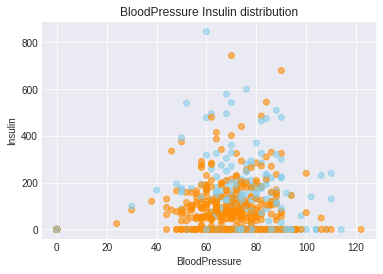

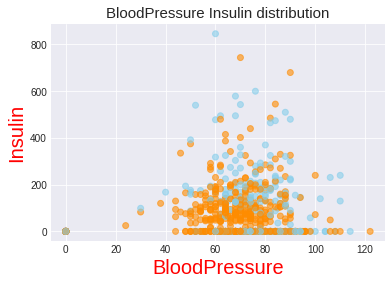

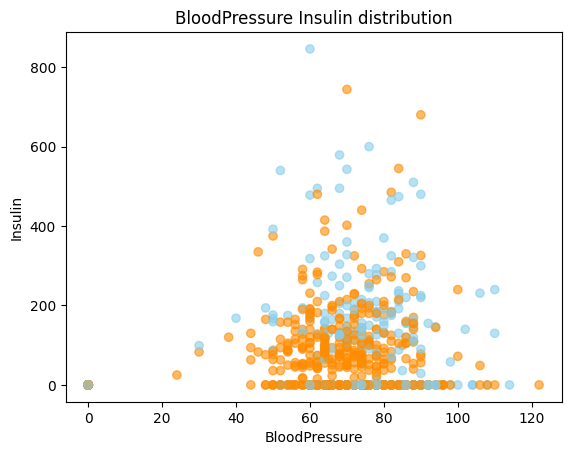

In [34]:
plt.scatter(ex_data['BloodPressure'],
            ex_data['Insulin'],
            c = color,
            alpha = 0.6)
plt.xlabel('BloodPressure')                
plt.ylabel('Insulin')
plt.title('BloodPressure Insulin distribution') 
plt.show()

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelcolor'] = 'red'
plt.rcParams['axes.titlesize'] = 15

plt.scatter(ex_data['BloodPressure'],
            ex_data['Insulin'],
            c = color,
            alpha = 0.6)
plt.xlabel('BloodPressure')                
plt.ylabel('Insulin')
plt.title('BloodPressure Insulin distribution') 
plt.show()

plt.rcdefaults()

plt.scatter(ex_data['BloodPressure'],
            ex_data['Insulin'],
            c = color,
            alpha = 0.6)
plt.xlabel('BloodPressure')                
plt.ylabel('Insulin')
plt.title('BloodPressure Insulin distribution') 
plt.show()

#### Please refer to module 3 of Intro to visualization in python - Static Plots for Tasks 19-24
#### Task 19
##### Create a simple violin plot of `percent_dependent` and show the results.
#### Result:


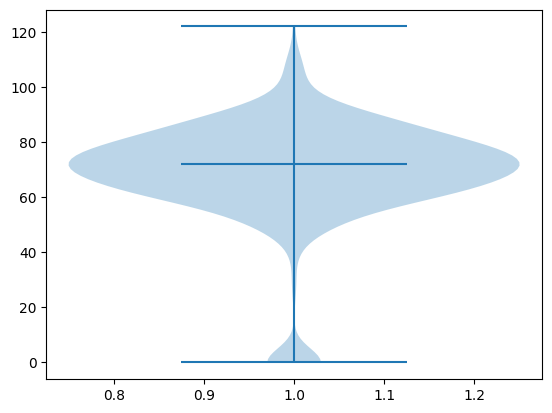

In [39]:
plt.violinplot(ex_data['BloodPressure'],showmeans=False, showmedians=True)
plt.show()

#### Task 20
##### Now try to create the same violin plot by changing its orientation to horizontal.
##### Also label the x-axis and title accordingly.


#### Result:


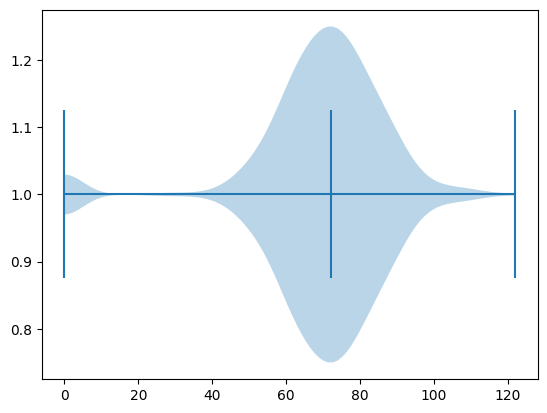

In [40]:
plt.violinplot(ex_data['BloodPressure'],showmeans=False, showmedians=True, vert= False)
plt.show()

#### Task 21
##### Use the `plt.subplots()` function and `ex_df_subset` data to create a 2x2 subplot of the following histogram, boxplot, scatterplot, and barplot:


- Histogram: Create a histogram on `'BloodPressure'` and change face color to `lightcoral`
- Boxplot: Create a box plot on `'BloodPressure'`
- Scatter plot: Create a scatterplot with the parameters `'BloodPressure'` and `'Insulin'`.
  - Set the scatterplot specifications similar to Task 14.
- Bar chart:
  - Create a bar chart with the same specifications as Task 10 and set the color to `thistle`



##### Hint: If the output does not render, then try to run the code in a single cell.


#### Result:


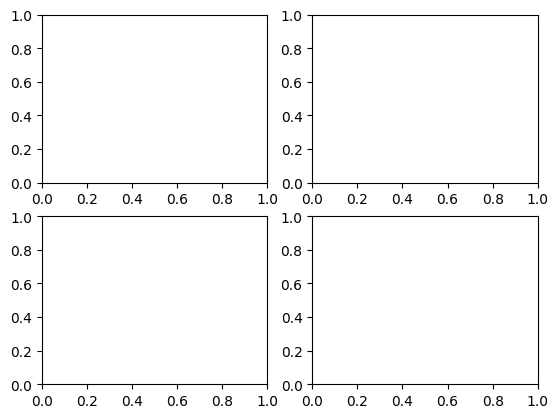

In [42]:
ax, fig = plt.subplots(2,2)

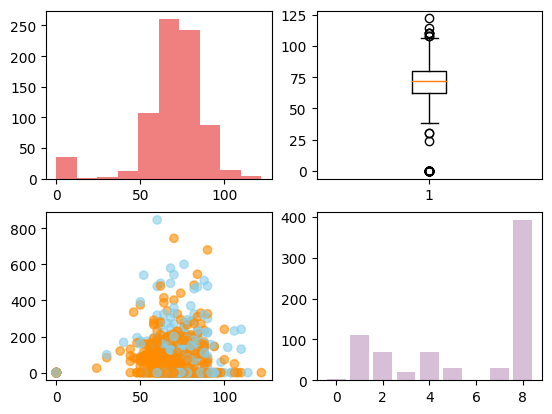

In [60]:
fig, ax = plt.subplots(2, 2)

ax1 = ax[0, 0].hist(ex_data['BloodPressure'], facecolor = 'lightcoral')
ax2 = ax[0, 1].boxplot(ex_data['BloodPressure'])
ax3 = ax[1, 0].scatter(ex_data['BloodPressure'],ex_data['Insulin'], color = color, alpha = 0.6)
ax4 = ax[1, 1].bar(ex_bar_positions, ex_bar_heights, color = "thistle")

plt.show()


#### Task 22
##### Create the above plot by labeling the axes of each of the four plots using `.set_xlabel()` and `.set_ylabel()`.
##### Set the ticks for the bar chart using `.set_ticks()`.
##### Also set the labels for ticks using `.set_ticklabels()` making sure the labels are rotated to a vertical position ( set `rotation`= 90 ).
##### Set the default parameters as:


- axes label size as 10
- title size as 25
- size inches as 18 and 7.7
- Title as `Exercise Data Summary`



##### Run the code in a single cell if the plot doesn't show.


#### Result:


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


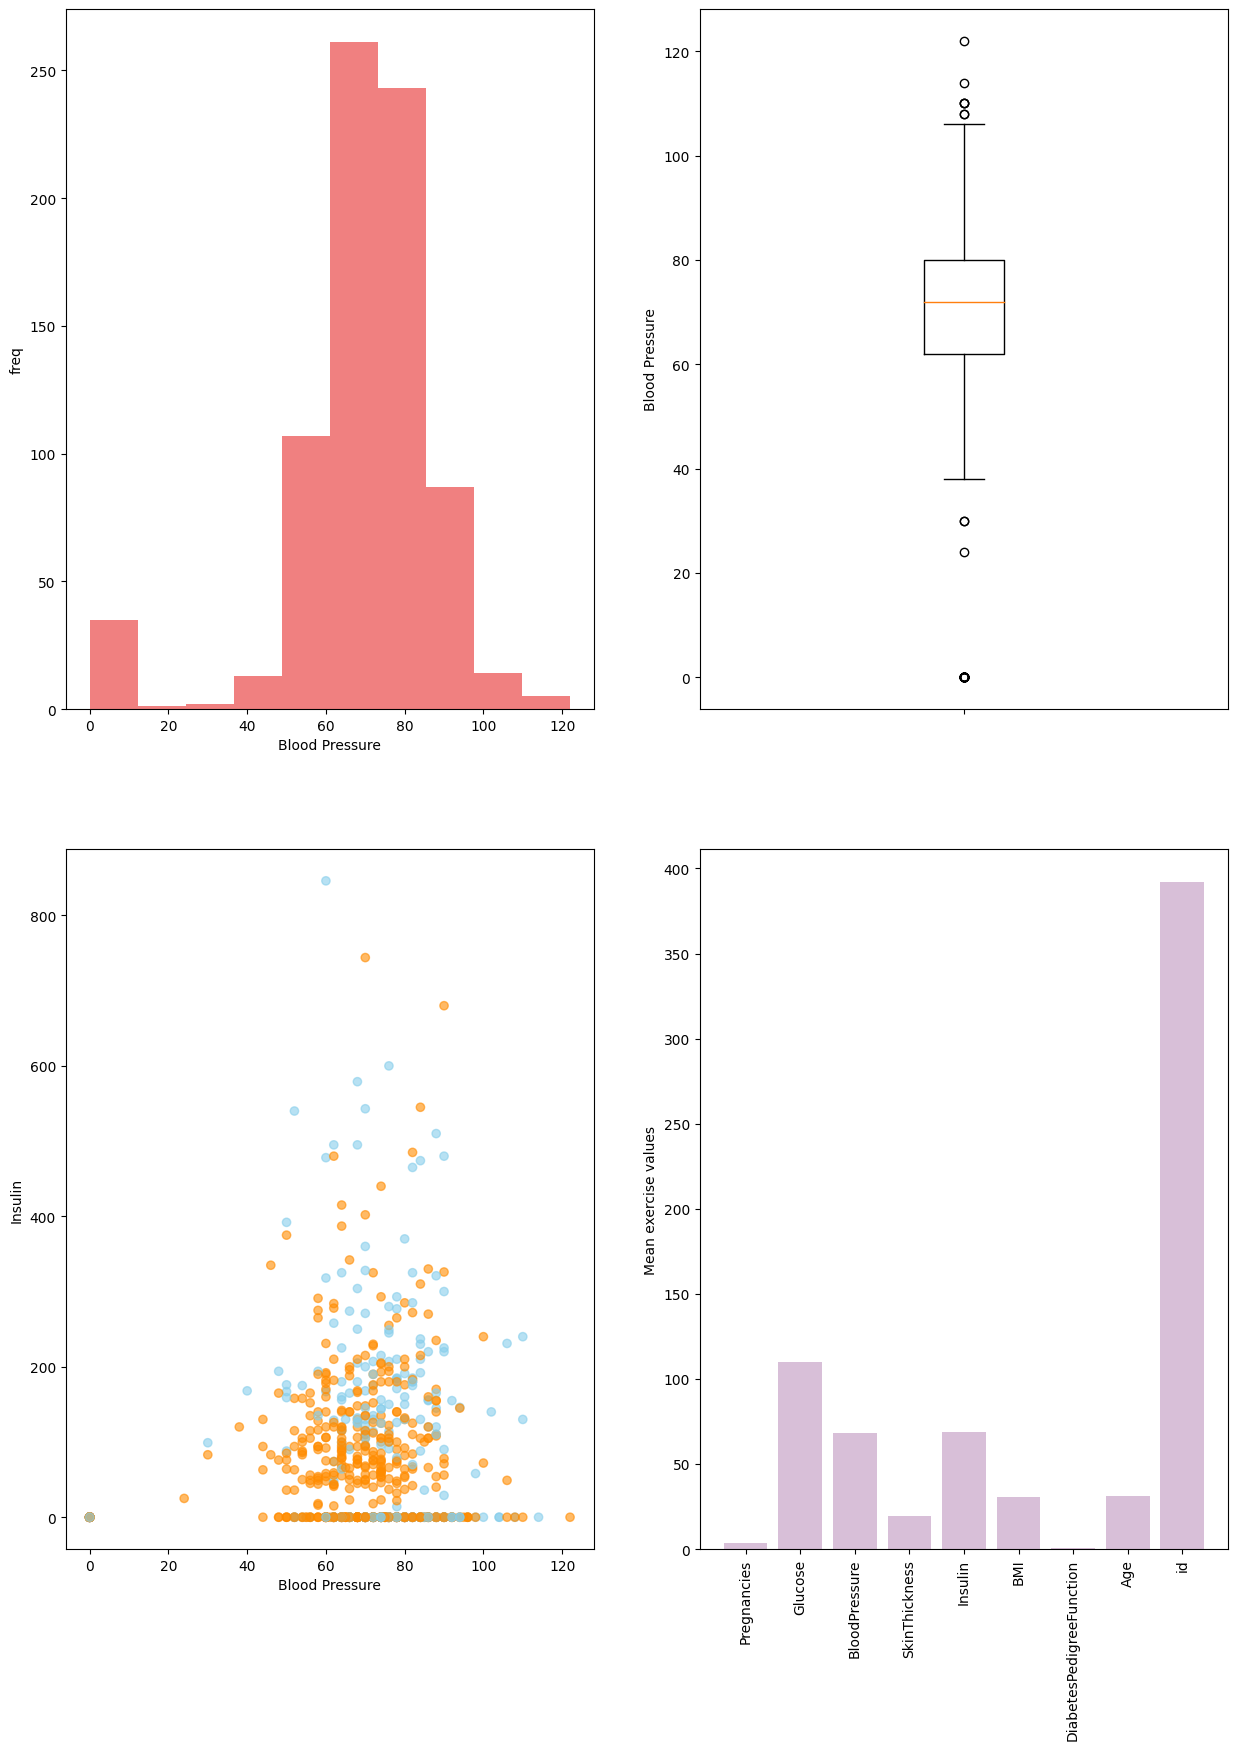

In [65]:

fig, ax = plt.subplots(2, 2, figsize = (15,20)) 

bp = 'Blood Pressure'
freq = 'freq'

ax[0, 0].set_ylabel(freq)
ax[0, 0].set_xlabel(bp)

ax[0, 1].set_ylabel(bp)

ax[1, 0].set_xlabel(bp)
ax[1, 0].set_ylabel('Insulin')
ax[1, 1].set_ylabel('Mean exercise values')

ax[0, 1].xaxis.set_ticklabels([""])
ax[1, 1].xaxis.set_ticks(ex_bar_positions)

ax[1, 1].xaxis.set_ticklabels(ex_bar_labels,rotation=90)



ax1 = ax[0, 0].hist(ex_data['BloodPressure'], facecolor = 'lightcoral')
ax2 = ax[0, 1].boxplot(ex_data['BloodPressure'])
ax3 = ax[1, 0].scatter(ex_data['BloodPressure'],ex_data['Insulin'], color = color, alpha = 0.6)
ax4 = ax[1, 1].bar(ex_bar_positions, ex_bar_heights, color = "thistle")


plt.show()


#### Task 23
##### Let's create a multiple layered scatterplot using the `plt.subplots()` function.
##### Define the `key` and `value` for the color dictionary `ex_color_dict`. 
##### Set the 'Outcome' as `Category 1` and `Category 2` for the different categories present in it respectively.
##### View the plot.
##### Hint: It's always better to clear the plotting area before rendering a new plot by using `plt.clf()`.


#### Result:


<Figure size 640x480 with 0 Axes>

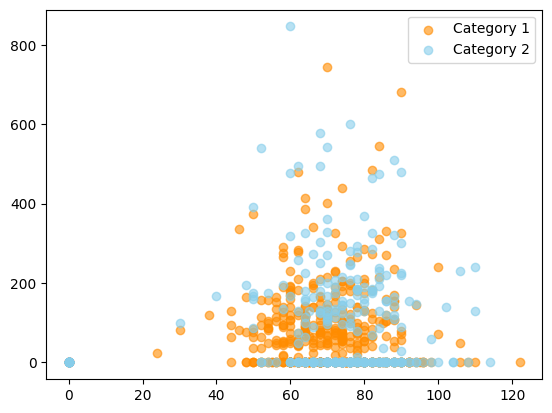

In [78]:

plt.clf()                  
fig, axes = plt.subplots() 

for key, value in ex_color_dict.items():
    query= 'Outcome'+'=='+str(key)
    ex_sc_col_1 = ex_data.query(query)['BloodPressure']
    ex_sc_col_2 = ex_data.query(query)['Insulin']

    axes.scatter(ex_sc_col_1, 
                 ex_sc_col_2, 
                 c = value, 
                 label = 'Category ' + str(key+1),
                 alpha = 0.6)
axes.legend() 

plt.show()
plt.close()



#### Task 24
##### Create a layered bar chart using the variables from the dataset.
##### Find the means of the data when 'Outcome' is '1' and save as `ex_false_means`.
##### Find the bar heights for both '0' and '1' levels of 'Outcome'.
##### Also define the other variables `bar_labels`, `num_bars`, `bar_position` and `width` necessary for a bar chart.
##### Clear the plotting area for a new plot and use `plt.subplot()` to visualize the bar chart.


#### Result:


                   parameter       value
0                Pregnancies    3.298000
2                    Glucose  109.980000
4              BloodPressure   68.184000
6              SkinThickness   19.664000
8                    Insulin   68.792000
10                       BMI   30.304200
12  DiabetesPedigreeFunction    0.429734
14                       Age   31.190000
16                        id  391.834000
                   parameter       value
1                Pregnancies    4.865672
3                    Glucose  141.257463
5              BloodPressure   70.824627
7              SkinThickness   22.164179
9                    Insulin  100.335821
11                       BMI   35.142537
13  DiabetesPedigreeFunction    0.550500
15                       Age   37.067164
17                        id  370.817164


<Figure size 640x480 with 0 Axes>

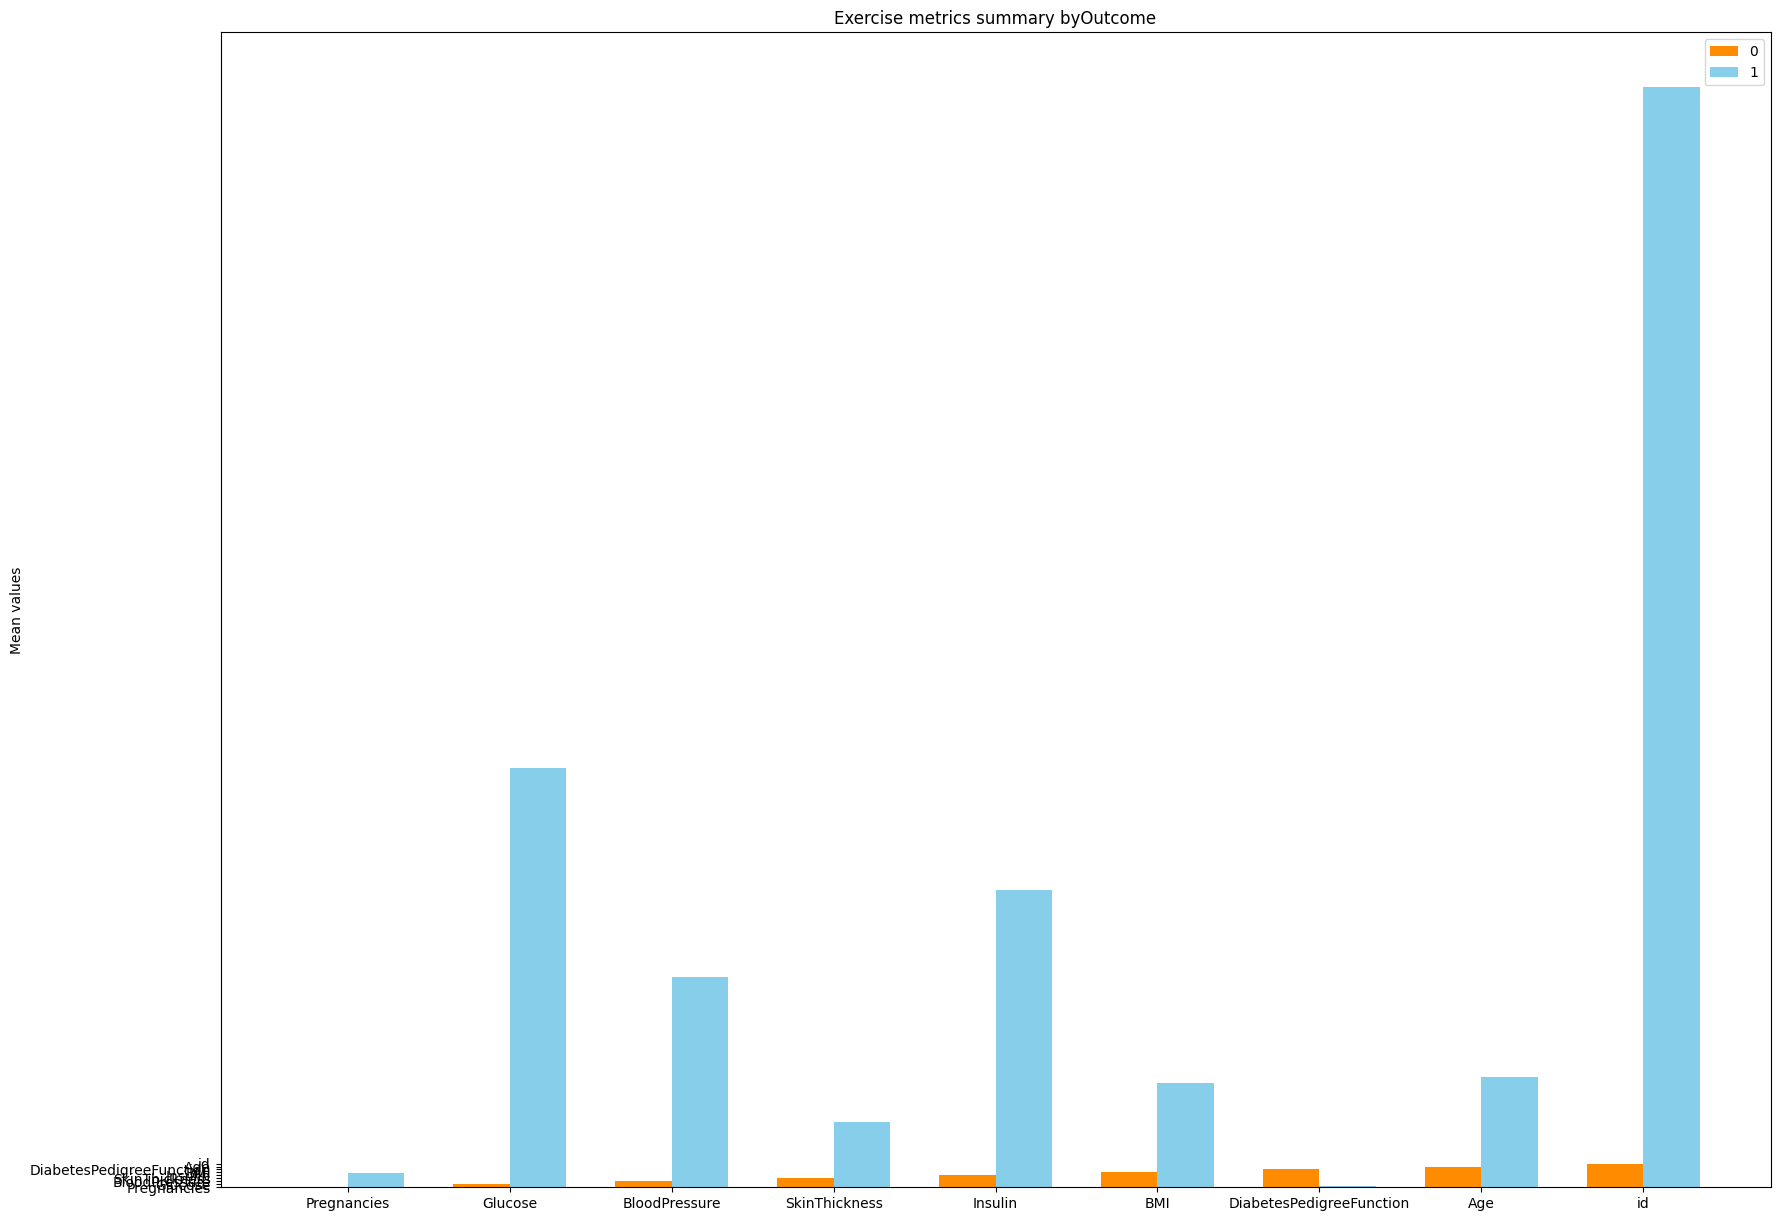

In [80]:

# We already have 'Outcome' mean data for a category.
print(ex_true_means)

# Let's get the mean data for the other category in 'Outcome'
query = 'Outcome' + '==' + '1'
ex_false_means = ex_grouped_mean_long.query(query)[['parameter','value']]
print(ex_false_means)

# Mean values for 'Outcome' = '0' data.
ex_category_1_bar_heights = ex_true_means['parameter'] 
# Mean values for 'Outcome' = '1' data.
ex_category_2_bar_heights = ex_false_means['value']
# Labels of bars, their width, and positions are shared for both categories.
bar_labels = ex_false_means['parameter'] 
num_bars = len(bar_labels)
bar_positions = np.arange(num_bars)       
width = 0.35

plt.clf()
# Create the figure and axes objects.
fig, axes = plt.subplots()

ex_category_1_bar_chart = axes.bar(bar_positions,          #<- set bar positions
                            ex_category_1_bar_heights,     #<- set bar heights
                            width,                 #<- set width of the bars
                            color = ex_color_dict[int('0')]) #<- set color to corresponding to '0' in dictionary
ex_category_2_bar_chart = axes.bar(bar_positions + width, #<- set bar positions 
                          ex_category_2_bar_heights,      #<- set bar heights
                          width,                 #<- set width of the bars
                          color = ex_color_dict[int('1')]) #<- set 


# Add text for labels, title and axes ticks.
axes.set_ylabel('Mean values')
axes.set_title('Exercise metrics summary by' + str('Outcome'))
axes.set_xticks(bar_positions + width/2)

axes.set_xticklabels(bar_labels)

# Add a legend for each chart and corresponding labels.
axes.legend((ex_category_1_bar_chart, ex_category_2_bar_chart), (int('0'), int('1')))

# Adjust figure size.
fig.set_size_inches(20, 15)
plt.show()


